In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
# Set plotting parameters
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'DejaVu Sans'],
    'svg.fonttype': 'none'
})
sns.set(style='whitegrid')

In [3]:
# Paths to CSV files
base_path = '/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/new_filtering2/results/'
tax_levels = ['phylum', 'class', 'order', 'family', 'genus', 'asv']

# Load and process data
data_frames = []
for level in tax_levels:
    df = pd.read_csv(f'{base_path}{level}.csv', index_col='test')
    significant = df[df.q < 0.05]
    total = len(df)
    rhythmic = len(significant)
    data_frames.append({
        'Taxonomic Level': f'{level.capitalize()}\n{rhythmic}/{total}',
        'Percentage Rhythmic': rhythmic / total * 100
    })
    data_frames.append({
        'Taxonomic Level': f'{level.capitalize()}\n{rhythmic}/{total}',
        'Percentage Rhythmic': 100
    })

# Create DataFrames
db = pd.DataFrame(data_frames[::2])
lb = pd.DataFrame(data_frames[1::2])

Text(0.5, 0, 'Percentage Rhythmic')

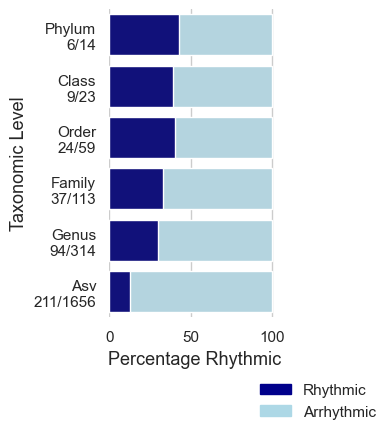

In [4]:
# Plotting
fig, ax = plt.subplots(figsize=(2.2, 4))
sns.despine(bottom=True, left=True)
sns.barplot(y='Taxonomic Level', x='Percentage Rhythmic', data=lb, color='lightblue', ax=ax)
sns.barplot(y='Taxonomic Level', x='Percentage Rhythmic', data=db, color='darkblue', ax=ax)

# Legend
top_bar = mpatches.Patch(color='darkblue', label='Rhythmic')
bottom_bar = mpatches.Patch(color='lightblue', label='Arrhythmic')
plt.legend(handles=[top_bar, bottom_bar], facecolor='white', loc=(0.85, -0.35), edgecolor='white', fontsize=11)

# Labels
ax.set_ylabel('Taxonomic Level', fontsize=13)
ax.set_xlabel('Percentage Rhythmic', fontsize=13)